In [1]:
# 필요 패키지 실행
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 데이터불러오기
csvFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/OBS_ASOS_TIM_20230308150606.csv'
df = pd.read_csv(csvFile, encoding = 'euc-kr')
df.head()

,지점,지점명,일시,기온(°C),습도(%),지면온도(°C)
0,108,서울,2023-03-01 01:00,6.1,68,3.6
1,108,서울,2023-03-01 02:00,6.2,69,3.5
2,108,서울,2023-03-01 03:00,6.0,70,3.0
3,108,서울,2023-03-01 04:00,5.8,70,3.2
4,108,서울,2023-03-01 05:00,5.7,69,3.3


In [4]:
df.tail()

,지점,지점명,일시,기온(°C),습도(%),지면온도(°C)
283,159,부산,2023-03-06 20:00,11.8,61,11.2
284,159,부산,2023-03-06 21:00,11.0,60,9.9
285,159,부산,2023-03-06 22:00,10.9,64,10.7
286,159,부산,2023-03-06 23:00,10.8,67,10.9
287,159,부산,2023-03-07 00:00,10.5,68,10.0


In [12]:
# 분석의 간편화를 위해 컬럼명 변경
df.columns = ['지점', '지점명', '일시', '기온', '습도', '지면온도']
df.columns

Index(['지점', '지점명', '일시', '기온', '습도', '지면온도'], dtype='object')

In [40]:
# 일시데이터를 datetime으로 변경해주기
# 타입을 변경하지 않고 그래프를 그렸을 시 일시가 제대로 나타나지 않는다
df['일시'] = pd.to_datetime(df['일시'])

In [41]:
df['일시']

0     2023-03-01 01:00:00
1     2023-03-01 02:00:00
2     2023-03-01 03:00:00
3     2023-03-01 04:00:00
4     2023-03-01 05:00:00
              ...        
283   2023-03-06 20:00:00
284   2023-03-06 21:00:00
285   2023-03-06 22:00:00
286   2023-03-06 23:00:00
287   2023-03-07 00:00:00
Name: 일시, Length: 288, dtype: datetime64[ns]

In [42]:
# 서울 데이터와 부산 데이터 나누기
# 서울 데이터
df_Seoul = df[df['지점명'] == '서울']
df_Seoul.head()

,지점,지점명,일시,기온,습도,지면온도
0,108,서울,2023-03-01 01:00:00,6.1,68,3.6
1,108,서울,2023-03-01 02:00:00,6.2,69,3.5
2,108,서울,2023-03-01 03:00:00,6.0,70,3.0
3,108,서울,2023-03-01 04:00:00,5.8,70,3.2
4,108,서울,2023-03-01 05:00:00,5.7,69,3.3


In [43]:
# 부산데이터
df_Busan = df[df['지점명'] == '부산']
df_Busan.head()

,지점,지점명,일시,기온,습도,지면온도
144,159,부산,2023-03-01 01:00:00,10.4,71,10.2
145,159,부산,2023-03-01 02:00:00,10.5,70,10.7
146,159,부산,2023-03-01 03:00:00,10.3,70,10.4
147,159,부산,2023-03-01 04:00:00,10.0,71,11.1
148,159,부산,2023-03-01 05:00:00,10.2,70,11.1


In [21]:
# 부산데이터의 인덱스를 초기화 해준다
df_Busan.reset_index(drop = True ,inplace = True)

In [44]:
df_Busan.head()

,지점,지점명,일시,기온,습도,지면온도
144,159,부산,2023-03-01 01:00:00,10.4,71,10.2
145,159,부산,2023-03-01 02:00:00,10.5,70,10.7
146,159,부산,2023-03-01 03:00:00,10.3,70,10.4
147,159,부산,2023-03-01 04:00:00,10.0,71,11.1
148,159,부산,2023-03-01 05:00:00,10.2,70,11.1


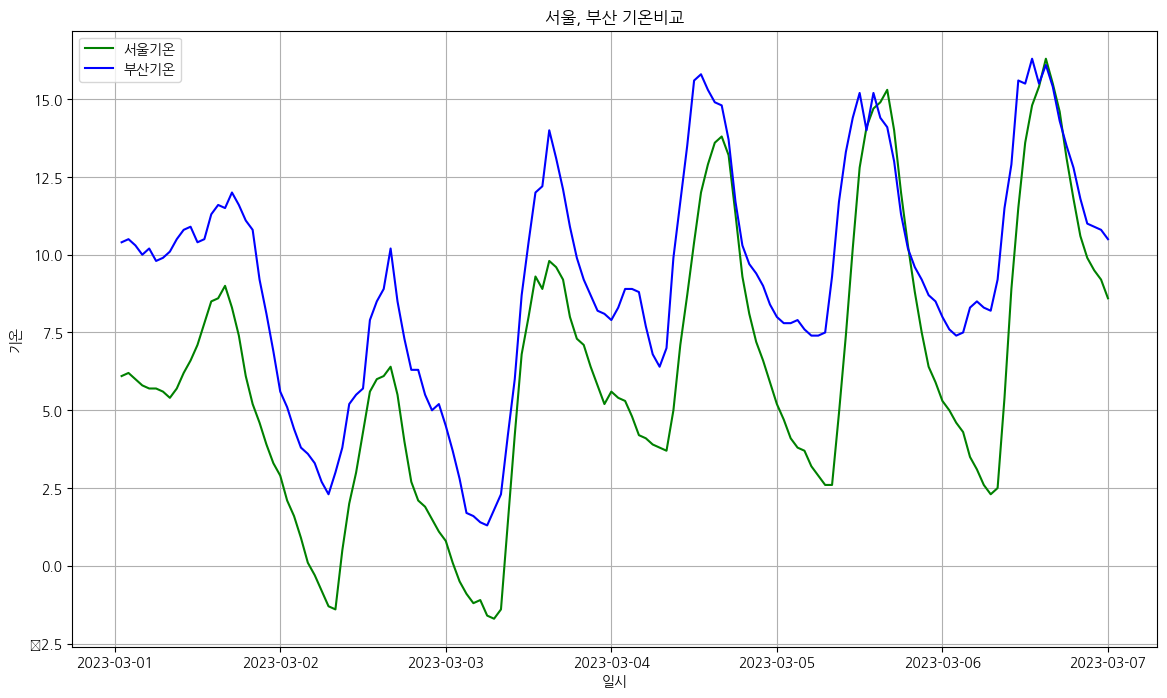

In [56]:
# 서울과 부산의 기온비교
plt.figure(figsize = (14, 8))
plt.xlabel('일시')
plt.ylabel('기온')
plt.plot(df_Seoul['일시'], df_Seoul['기온'], 'g', label = '서울기온')
plt.plot(df_Busan['일시'], df_Busan['기온'], 'b', label = '부산기온')
plt.title('서울, 부산 기온비교')
plt.grid()
plt.legend()
plt.show()


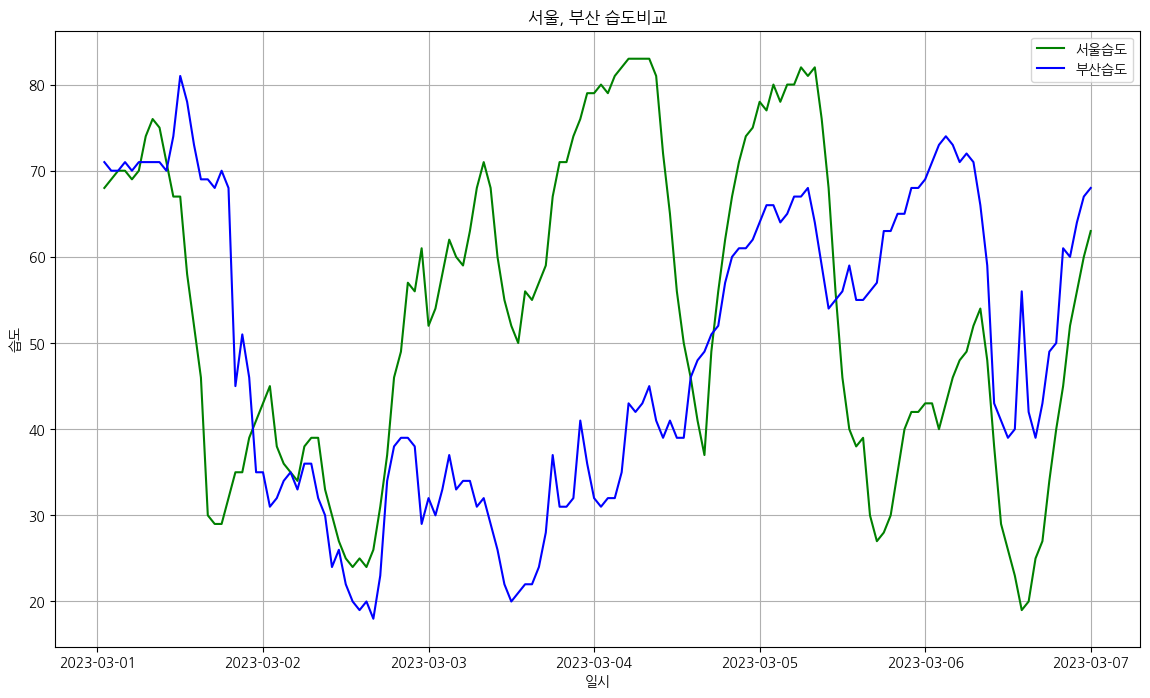

In [57]:
# 서울과 부산의 습도비교
plt.figure(figsize = (14, 8))
plt.xlabel('일시')
plt.ylabel('습도')
plt.plot(df_Seoul['일시'], df_Seoul['습도'], 'g', label = '서울습도')
plt.plot(df_Busan['일시'], df_Busan['습도'], 'b', label = '부산습도')
plt.title('서울, 부산 습도비교')
plt.grid()
plt.legend()
plt.show()

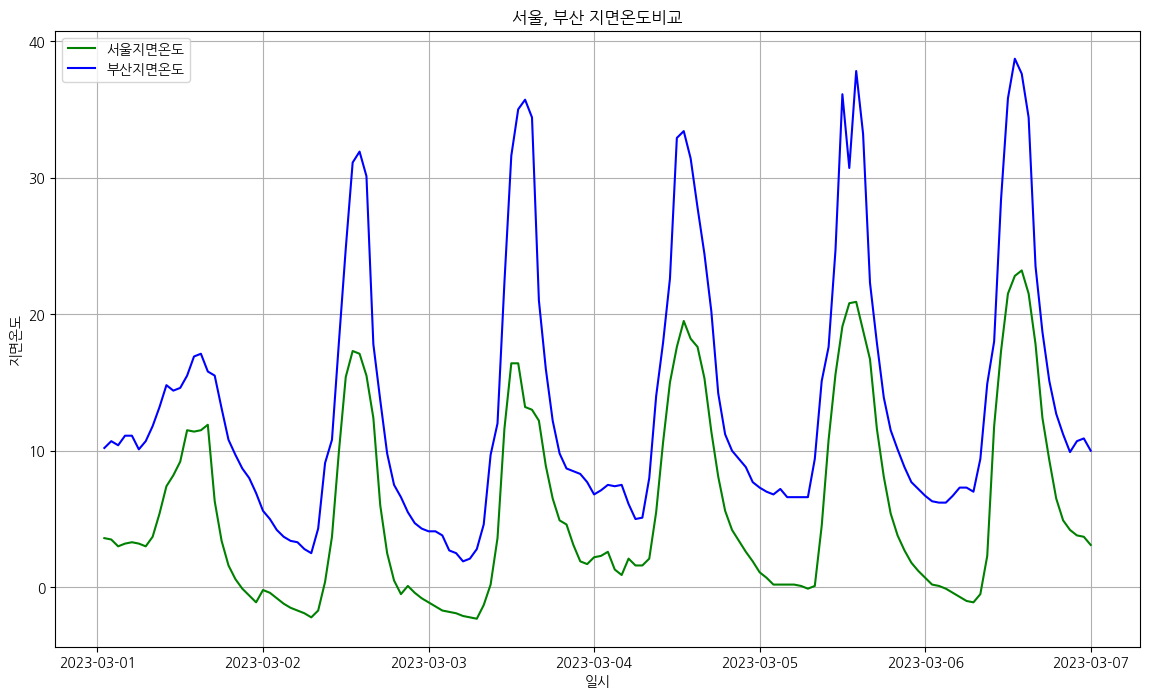

In [58]:
# 서울과 부산의 지면온도 비교
plt.figure(figsize = (14, 8))
plt.xlabel('일시')
plt.ylabel('지면온도')
plt.plot(df_Seoul['일시'], df_Seoul['지면온도'], 'g', label = '서울지면온도')
plt.plot(df_Busan['일시'], df_Busan['지면온도'], 'b', label = '부산지면온도')
plt.title('서울, 부산 지면온도비교')
plt.grid()
plt.legend()
plt.show()

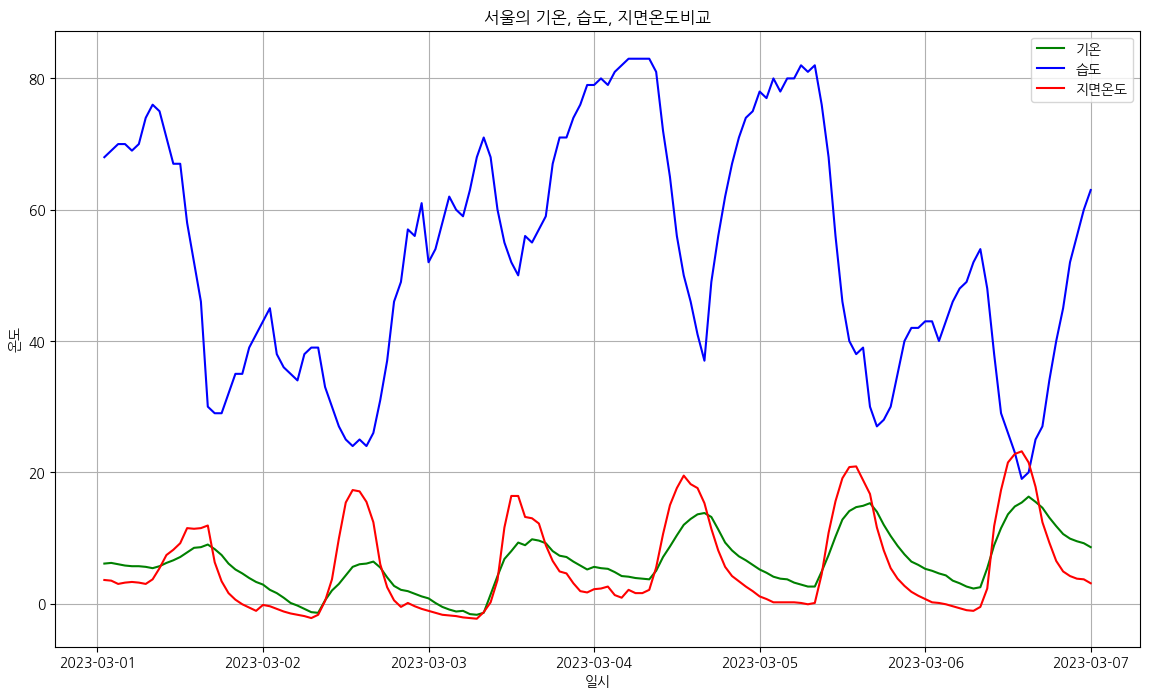

In [63]:
# 서울지역의 기온과 습도. 지면온도 비교
plt.figure(figsize = (14, 8))
plt.xlabel('일시')
plt.ylabel('온도')
plt.plot(df_Seoul['일시'], df_Seoul['기온'], 'g', label = '기온')
plt.plot(df_Seoul['일시'], df_Seoul['습도'], 'b', label = '습도')
plt.plot(df_Seoul['일시'], df_Seoul['지면온도'], 'r', label = '지면온도')
plt.title('서울의 기온, 습도, 지면온도비교')
plt.grid()
plt.legend()
plt.show()

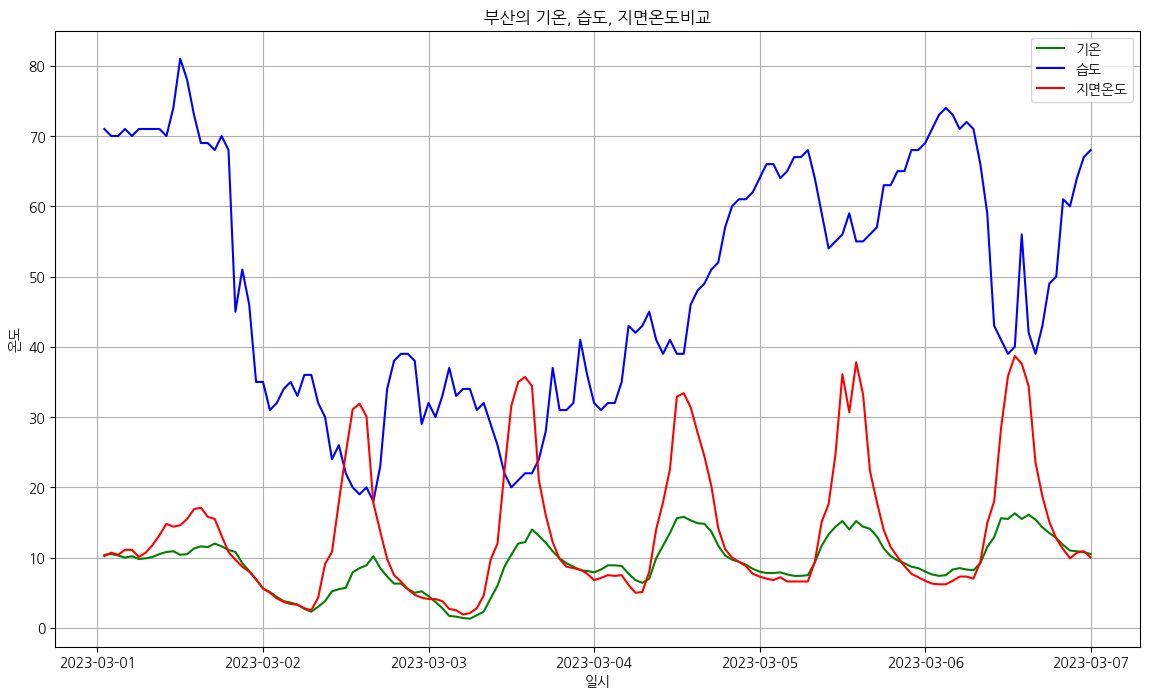

In [62]:
# 부산지역의 기온과 습도. 지면온도 비교
plt.figure(figsize = (14, 8))
plt.xlabel('일시')
plt.ylabel('온도')
plt.plot(df_Busan['일시'], df_Busan['기온'], 'g', label = '기온')
plt.plot(df_Busan['일시'], df_Busan['습도'], 'b', label = '습도')
plt.plot(df_Busan['일시'], df_Busan['지면온도'], 'r', label = '지면온도')
plt.title('부산의 기온, 습도, 지면온도비교')
plt.grid()
plt.legend()
plt.show()

* 참고:https://github.com/youngwoos/Doit_Python